installing libraries ( it should be run only once )

In [106]:
# Run the below line only once

# !pip install seaborn plotly reportlab

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [108]:
df = pd.read_csv("survey_data.csv")

our dataset preview

In [109]:
print("First 5 rows of dataset:")
print(df.head())
print("\nDataset Info:")
print(df.info())


First 5 rows of dataset:
   ID  Age  Gender    Country  Satisfaction Preferred_Platform  \
0   1   58  Female  Australia             4             Reddit   
1   2   25   Other    Germany             3            Twitter   
2   3   19    Male    Germany             2          Instagram   
3   4   35    Male        USA             3             Reddit   
4   5   33  Female  Australia             3            Twitter   

  Usage_Frequency Recommend  
0         Monthly       Yes  
1         Monthly        No  
2           Daily        No  
3           Daily       Yes  
4          Weekly        No  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  1000 non-null   int64 
 1   Age                 1000 non-null   int64 
 2   Gender              1000 non-null   object
 3   Country             1000 non-null

EDA Begins

Gender distribution (we use Pie chart)

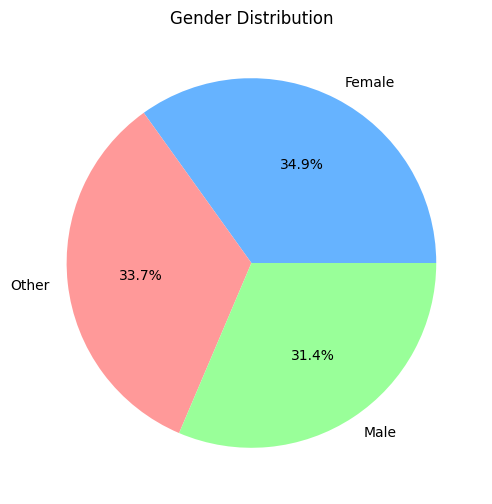

In [110]:
plt.figure(figsize=(6,6))
df['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#66b3ff','#ff9999','#99ff99'])
plt.title("Gender Distribution")
plt.ylabel("")
plt.show()

showing Preferred platform (Bar chart)

/tmp/ipython-input-1480457671.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




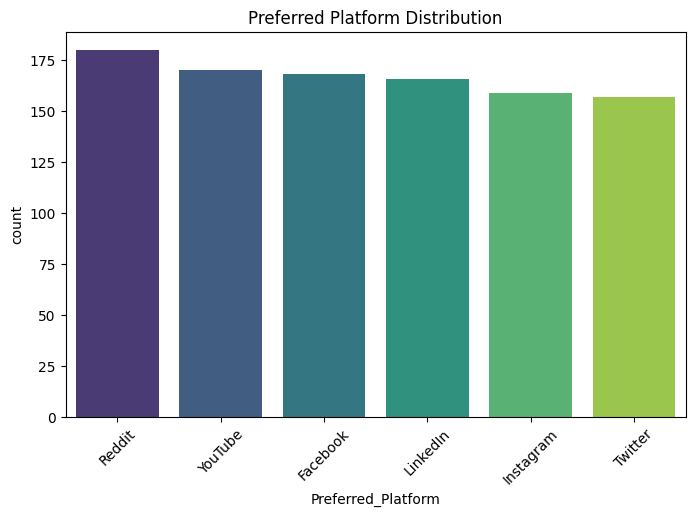

In [111]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="Preferred_Platform", order=df['Preferred_Platform'].value_counts().index, palette="viridis")
plt.title("Preferred Platform Distribution")
plt.xticks(rotation=45)
plt.show()

here we show Satisfaction levels (Histogram)

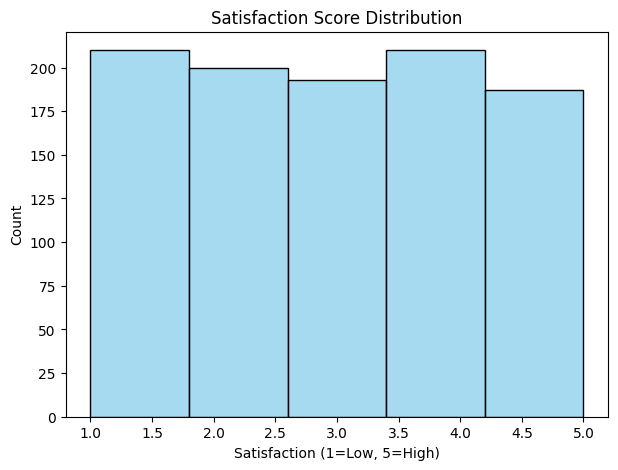

In [112]:
plt.figure(figsize=(7,5))
sns.histplot(df["Satisfaction"], bins=5, kde=False, color="skyblue")
plt.title("Satisfaction Score Distribution")
plt.xlabel("Satisfaction (1=Low, 5=High)")
plt.ylabel("Count")
plt.show()

Usage frequency compared with Satisfaction

/tmp/ipython-input-913942208.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




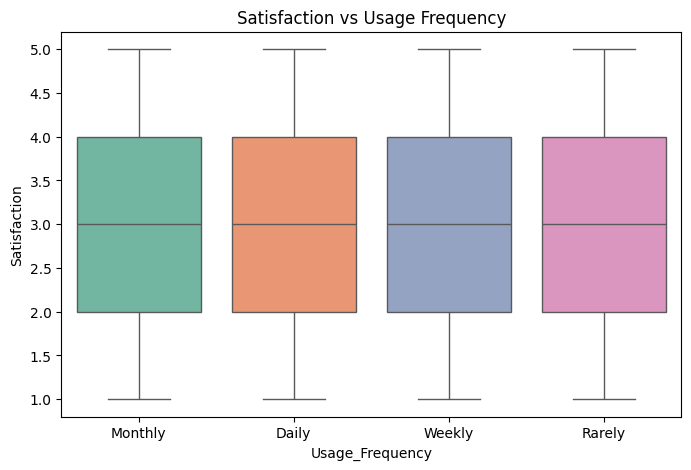

In [113]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="Usage_Frequency", y="Satisfaction", palette="Set2")
plt.title("Satisfaction vs Usage Frequency")
plt.show()

a Correlation heatmap

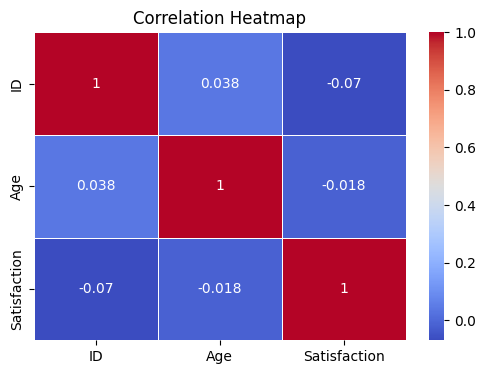

In [114]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

From now, we visualize with Plotly

histogram of satisfaction by Gender

In [115]:
fig = px.histogram(df, x="Satisfaction", color="Gender", barmode="group",
                   title="Satisfaction by Gender", nbins=5)
fig.show()

A Bar chart showing preffered platform in variuos countries

In [116]:
fig2 = px.bar(df, x="Preferred_Platform", color="Country", title="Platform Preference by Country")
fig2.show()

Exporting PDF

In [117]:
from reportlab.platypus import SimpleDocTemplate, Paragraph, Spacer, Image, PageBreak
from reportlab.lib.pagesizes import A4
from reportlab.lib.styles import getSampleStyleSheet


def generate_full_pdf(df):
    # Create PDF document
    doc = SimpleDocTemplate("survey_summary.pdf", pagesize=A4)
    styles = getSampleStyleSheet()
    elements = []

        # Our Title Page
    elements.append(Paragraph("Survey Data Analysis Report", styles["Title"]))
    elements.append(Spacer(1, 24))
    elements.append(Paragraph("This report summarizes survey results with visual insights and analysis.", styles["Normal"]))
    #elements.append(PageBreak())


    # --- Dataset Info. ---
    elements.append(Paragraph("Dataset Information", styles["Heading2"]))
    elements.append(Paragraph(f"Total Responses: {len(df)}", styles["Normal"]))
    elements.append(Paragraph(f"Columns: {', '.join(df.columns)}", styles["Normal"]))
    elements.append(Spacer(1, 12))


    # Saving & Adding Each Chart
    charts = []

    # Our first chart-- Gender Distribution
    elements.append(Paragraph("Gender Distribution", styles["Heading2"]))
    elements.append(Image("chart_gender.png", width=500, height=500))
    elements.append(Spacer(1, 20))
    #elements.append(PageBreak())


    # Our second chart-- Preferred Platform
    elements.append(Paragraph("Preferred Platform Distribution", styles["Heading2"]))
    elements.append(Image("chart_platform.png", width=500, height=280))
    elements.append(Spacer(1, 20))




    # Third chart-- Satisfaction Distribution
    elements.append(Paragraph("Satisfaction Score Distribution", styles["Heading2"]))
    elements.append(Image("chart_satisfaction.png", width=500, height=280))
    elements.append(PageBreak())


    # Fourthchart-- Usage vs Satisfaction
    elements.append(Paragraph("Satisfaction vs Usage Frequency", styles["Heading2"]))
    elements.append(Image("chart_usage.png", width=500, height=280))
    elements.append(Spacer(1, 20))



    # Last and Final chart-- Heatmap
    elements.append(Paragraph("Correlation Heatmap", styles["Heading2"]))
    elements.append(Image("chart_heatmap.png", width=500, height=280))
    elements.append(Spacer(1, 20))


    # Adding all our charts to PDF.
    for title, img_path in charts:
        elements.append(Paragraph(title, styles["Heading2"]))
        elements.append(Image(img_path, width=400, height=250))
        elements.append(Spacer(1, 12))


    # Building the PDF
    doc.build(elements)
    print("✅ Full PDF Report Generated: survey_summary.pdf")

# Run the function
generate_full_pdf(df)


✅ Full PDF Report Generated: survey_summary.pdf


In [118]:
#Run below two lines to download PDF

#from google.colab import files
#files.download("survey_summary.pdf")
